# Idea

Read all the csv files containing the features + their importance score and assign ranks for the topk for each label

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd

import sys
repo_base_path = Path("./../").resolve()

output_dir = repo_base_path / "feature_selection" / "result"

assert str(repo_base_path).endswith("csg_is"), f"{repo_base_path} is not a valid path to the CSG_IS repository" 

sys.path.append(str(repo_base_path))

from py_dataset import get_all_files_df
from py_dataset import read_in_files
from py_dataset import feature_plotting
from py_dataset import feature_selection

In [2]:
files = list(output_dir.glob("*.csv"))
files

[PosixPath('/home/<User>/repos/csg_is/feature_selection/result/network_datax960s_Heqing_device2_featurescores.csv'),
 PosixPath('/home/<User>/repos/csg_is/feature_selection/result/network_datax40s_Heqing_device2_featurescores.csv'),
 PosixPath('/home/<User>/repos/csg_is/feature_selection/result/block_data_Heqing_device2_featurescores.csv'),
 PosixPath('/home/<User>/repos/csg_is/feature_selection/result/RES_data_Heqing_device2_featurescores_ROBUST.csv'),
 PosixPath('/home/<User>/repos/csg_is/feature_selection/result/SYS_dataSystemVersion.old-bow_Heqing_device2_featurescores.csv'),
 PosixPath('/home/<User>/repos/csg_is/feature_selection/result/block_data_Heqing_device2_featurescores_ROBUST.csv'),
 PosixPath('/home/<User>/repos/csg_is/feature_selection/result/KERN_data_Heqing_device2_featurescores.csv'),
 PosixPath('/home/<User>/repos/csg_is/feature_selection/result/SYS_dataSystemVersion.TWOxGRAM_Heqing_device2_featurescores.csv'),
 PosixPath('/home/<User>/repos/csg_is/feature_selection/r

In [3]:
import os

dfs = []
for file in files:
    infos = file.stem.split("_")

    df = pd.read_csv(str(file))
    df["data_source"] = "_".join(infos[0:2])
    df["device"] = "_".join(infos[2:4])
    df["is_robust"] = True if len(infos) > 5 and infos[5] == "ROBUST" else False

    dfs.append(df)

df = pd.concat(dfs)
df

,chi2,f_classif,mutual_info_classif,feature,label,data_source,device,is_robust
0,0.024650,0.390793,0.018838,(OLD) PacketCount,1_normal,network_datax960s,Heqing_device2,False
1,0.000563,0.008145,0.110309,(OLD) TotalLength,1_normal,network_datax960s,Heqing_device2,False
2,0.015181,0.553157,0.072971,(OLD) AverageLength,1_normal,network_datax960s,Heqing_device2,False
3,0.014969,0.518494,0.000000,(OLD) MedianLength,1_normal,network_datax960s,Heqing_device2,False
4,0.005461,0.251820,0.007398,(OLD) MinLength,1_normal,network_datax960s,Heqing_device2,False
...,...,...,...,...,...,...,...,...
202,51.176344,380.283392,0.045646,writeback:writeback_dirty_page,3_thetick,KERN_data,Heqing_device2,True
203,0.000370,0.012030,0.000000,writeback:writeback_mark_inode_dirty,3_thetick,KERN_data,Heqing_device2,True
204,30.086652,68.701713,0.008235,writeback:writeback_single_inode,3_thetick,KERN_data,Heqing_device2,True
205,30.259659,69.065660,0.008695,writeback:writeback_write_inode,3_thetick,KERN_data,Heqing_device2,True


In [4]:
print(df["device"].unique())
df = df[~df["is_robust"]]

df = df.drop(columns=["is_robust", "device"])

df

['Heqing_device2']


,chi2,f_classif,mutual_info_classif,feature,label,data_source
0,0.024650,0.390793,0.018838,(OLD) PacketCount,1_normal,network_datax960s
1,0.000563,0.008145,0.110309,(OLD) TotalLength,1_normal,network_datax960s
2,0.015181,0.553157,0.072971,(OLD) AverageLength,1_normal,network_datax960s
3,0.014969,0.518494,0.000000,(OLD) MedianLength,1_normal,network_datax960s
4,0.005461,0.251820,0.007398,(OLD) MinLength,1_normal,network_datax960s
...,...,...,...,...,...,...
1039,8.739920,72.296545,0.024950,writeback:writeback_single_inode_start,9_xmrig,FLS_data
1040,2.654147,29.874139,0.012072,writeback:writeback_start,9_xmrig,FLS_data
1041,8.899036,69.082521,0.028515,writeback:writeback_write_inode,9_xmrig,FLS_data
1042,8.899036,69.082521,0.029355,writeback:writeback_write_inode_start,9_xmrig,FLS_data


In [6]:
df["data_source"].unique()

array(['network_datax960s', 'network_datax40s', 'block_data',
       'SYS_dataSystemVersion.old-bow', 'KERN_data',
       'SYS_dataSystemVersion.TWOxGRAM', 'RES_data', 'entropy_data',
       'SYS_dataSystemVersion.OLDxBOWxWithoutMinMax', 'FLS_data'],
      dtype=object)

In [13]:
delete_mask = (df["data_source"] == "network_datax960s") | (df["data_source"] == 'SYS_dataSystemVersion.TWOxGRAM') | (df["data_source"] == 'SYS_dataSystemVersion.OLDxBOWxWithoutMinMax')

print(df[~delete_mask]["data_source"].unique())

df = df[~delete_mask]

['network_datax40s' 'block_data' 'SYS_dataSystemVersion.old-bow'
 'KERN_data' 'RES_data' 'entropy_data' 'FLS_data']


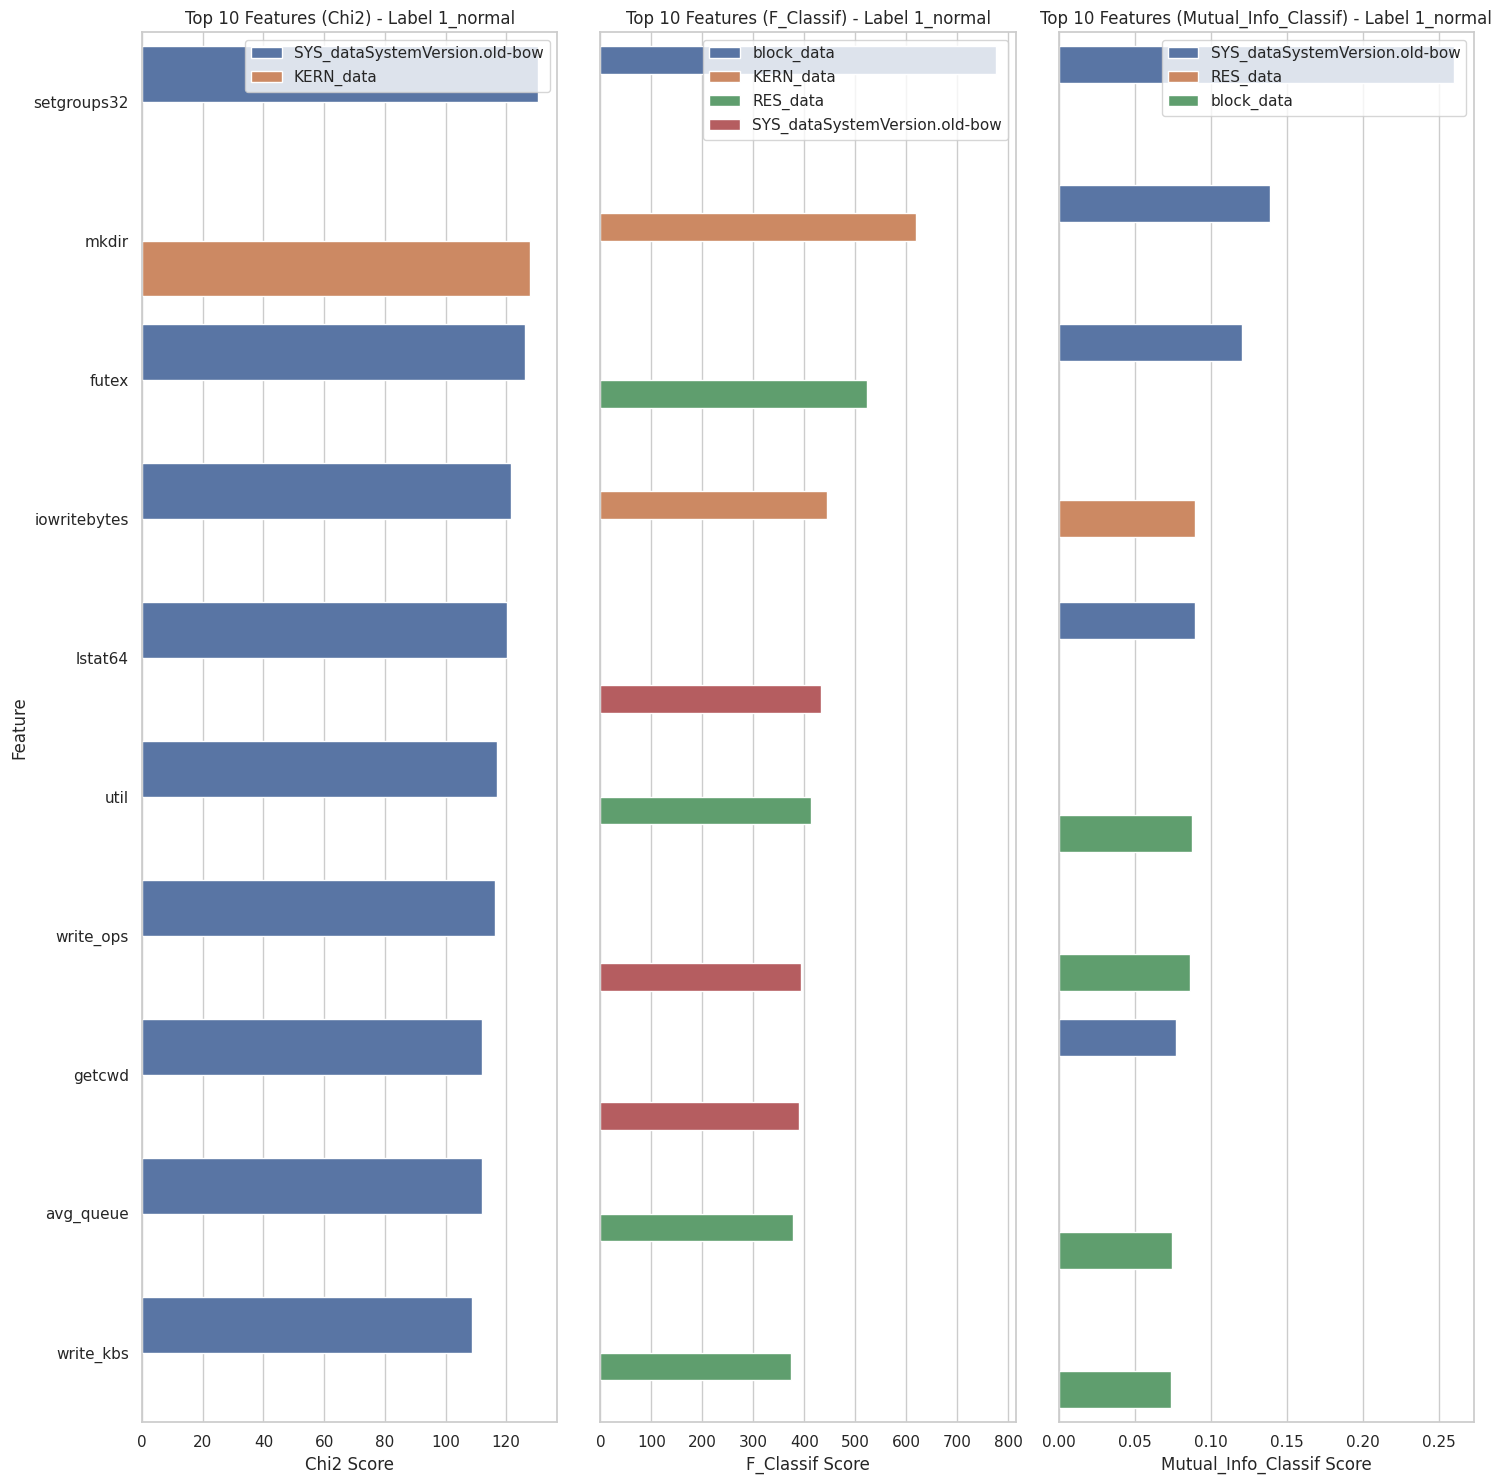

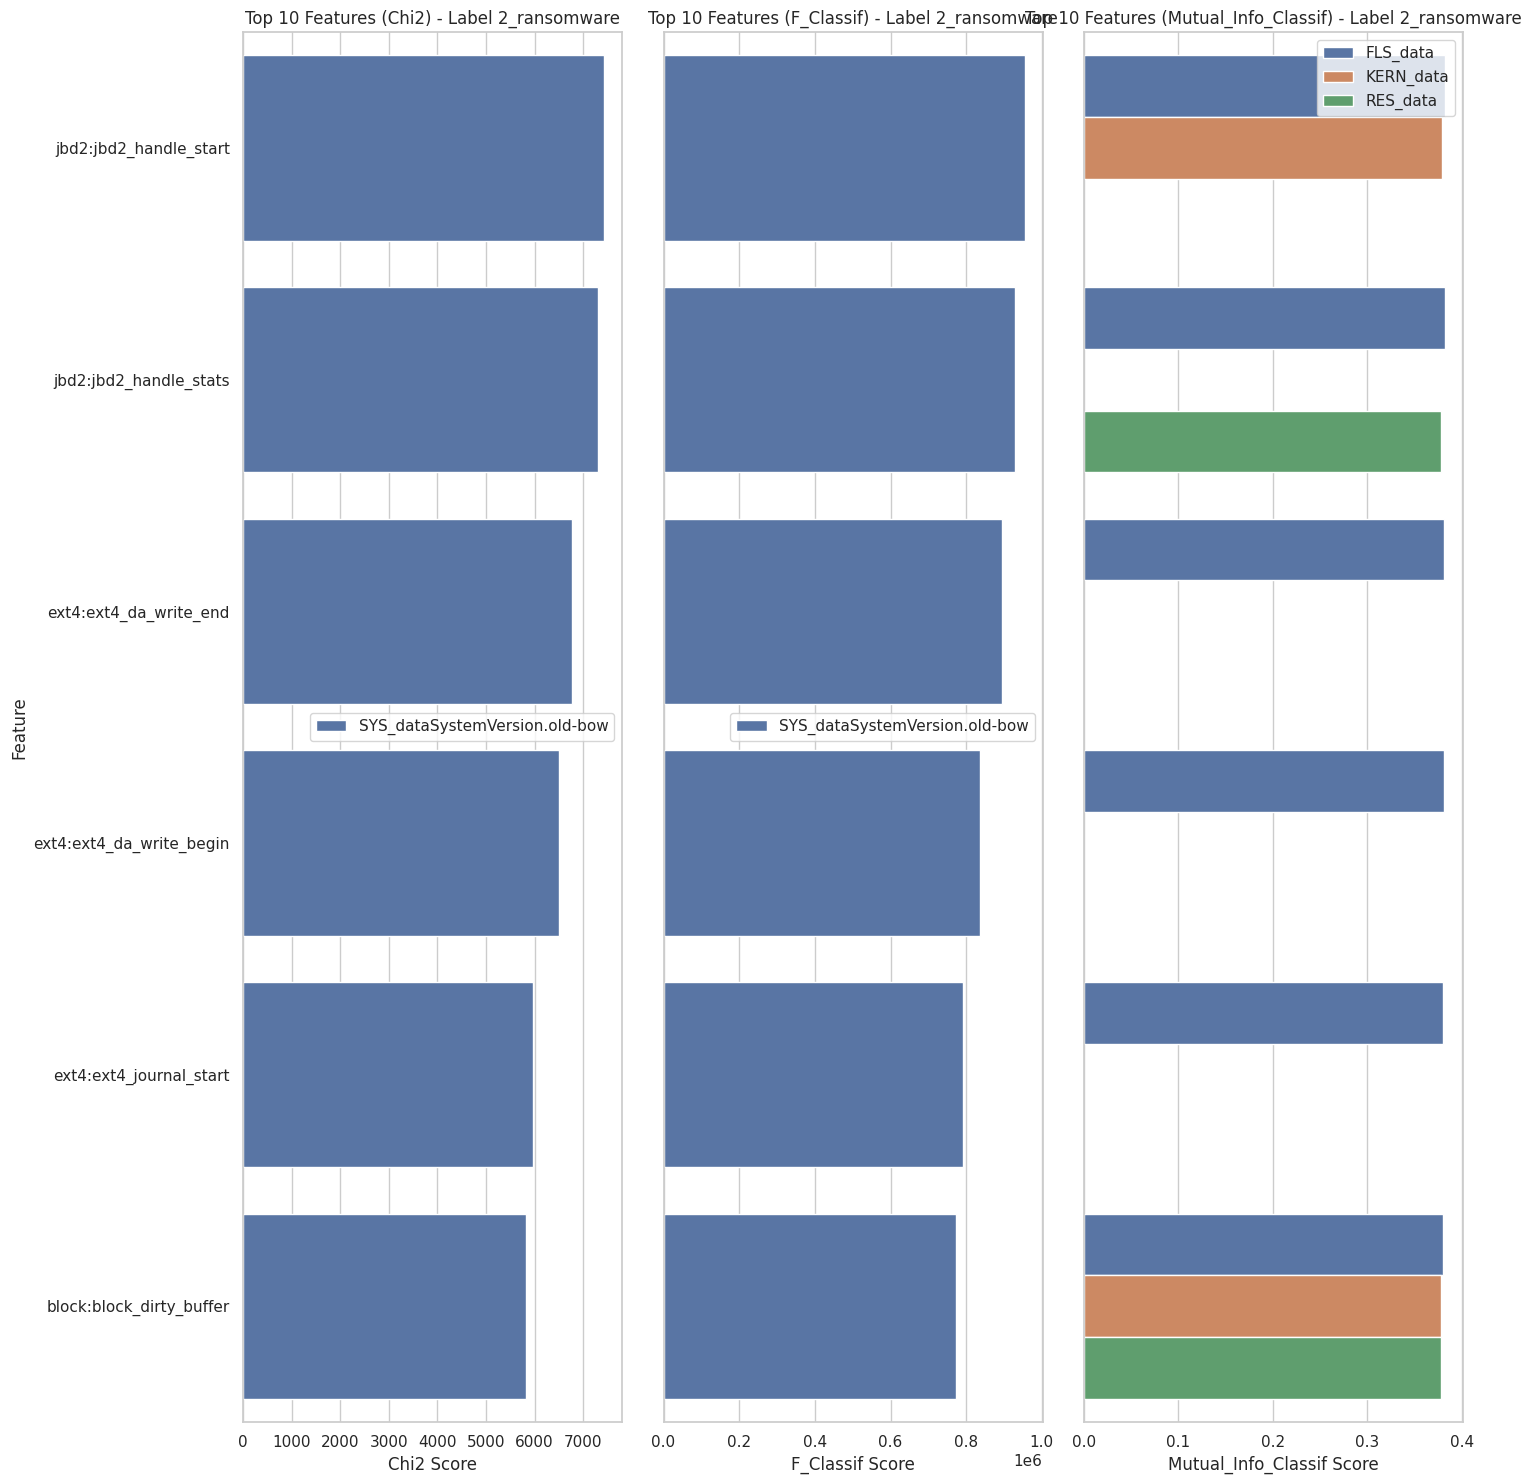

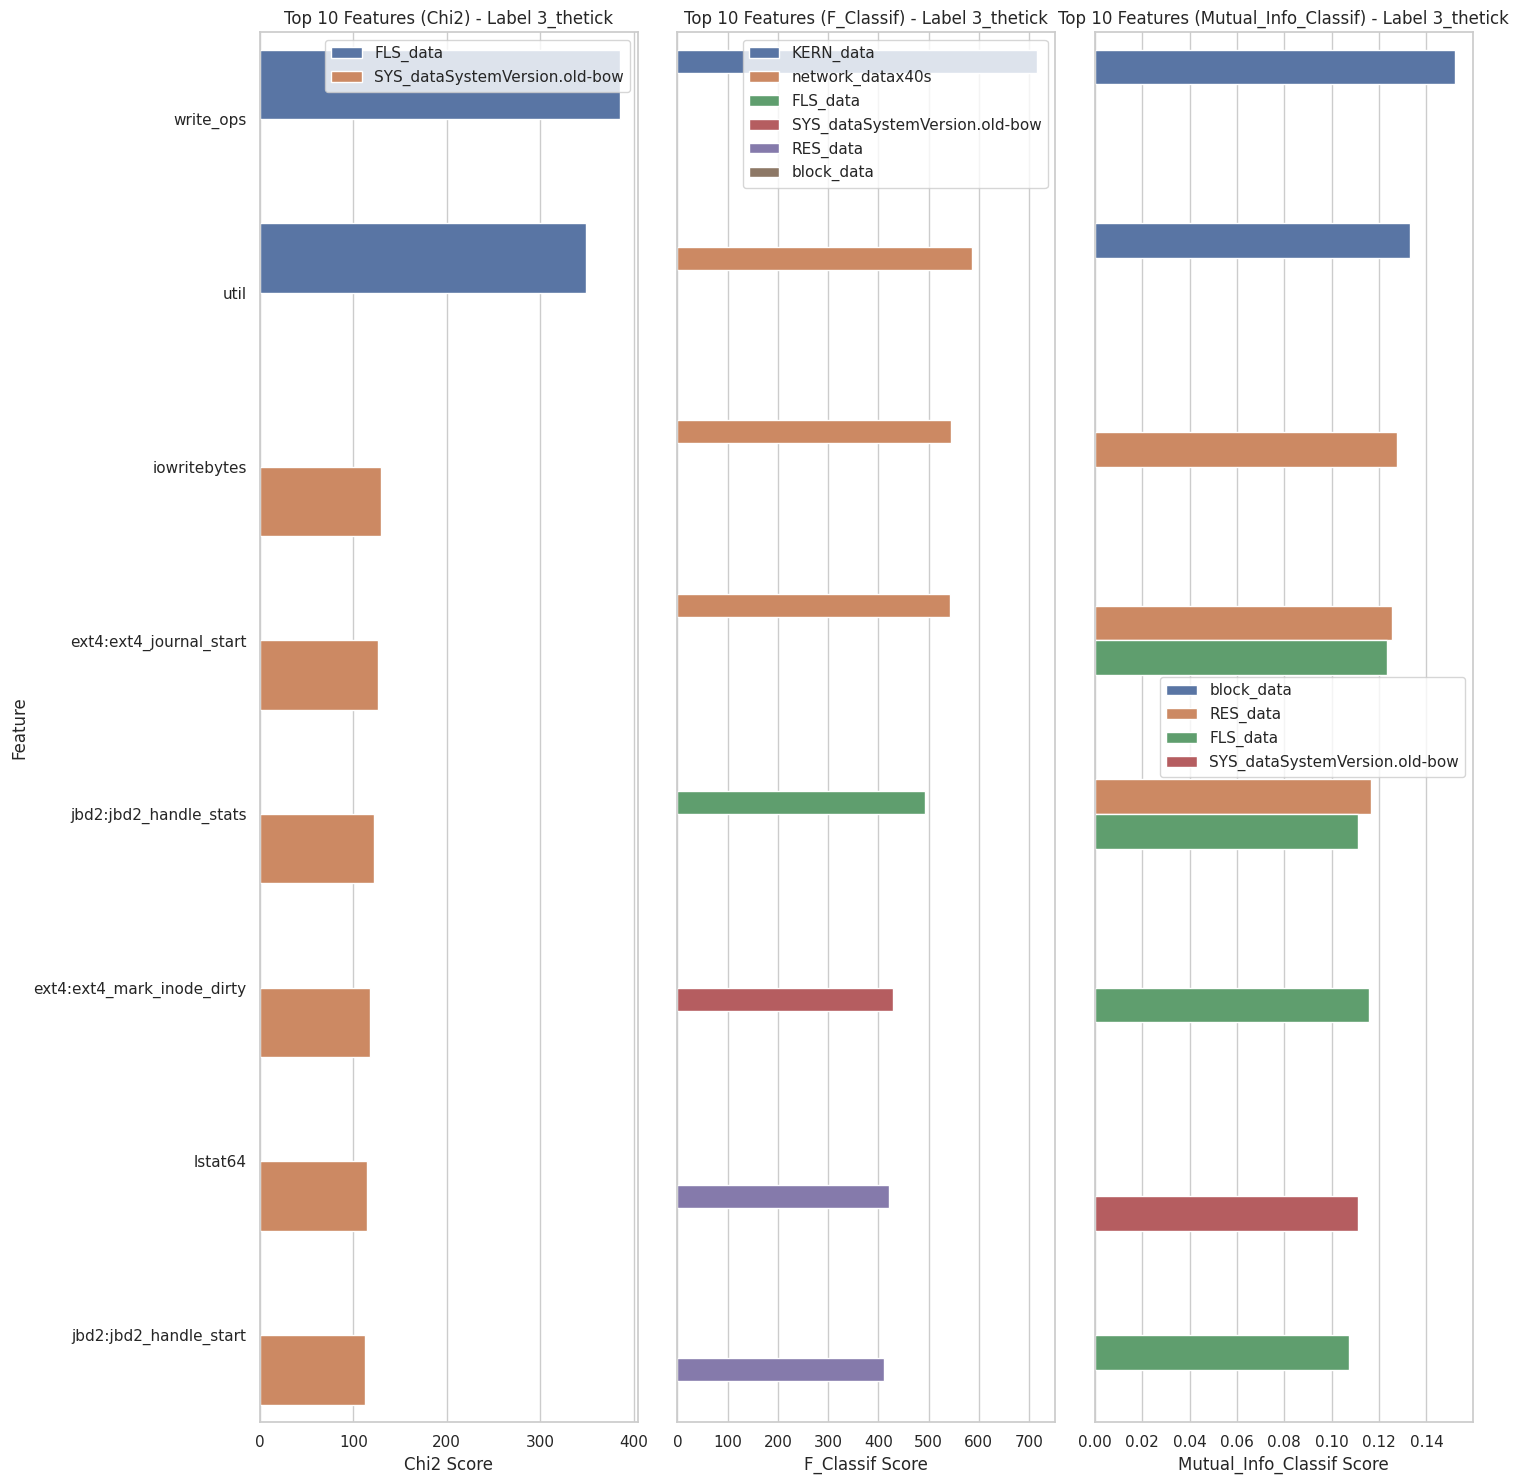

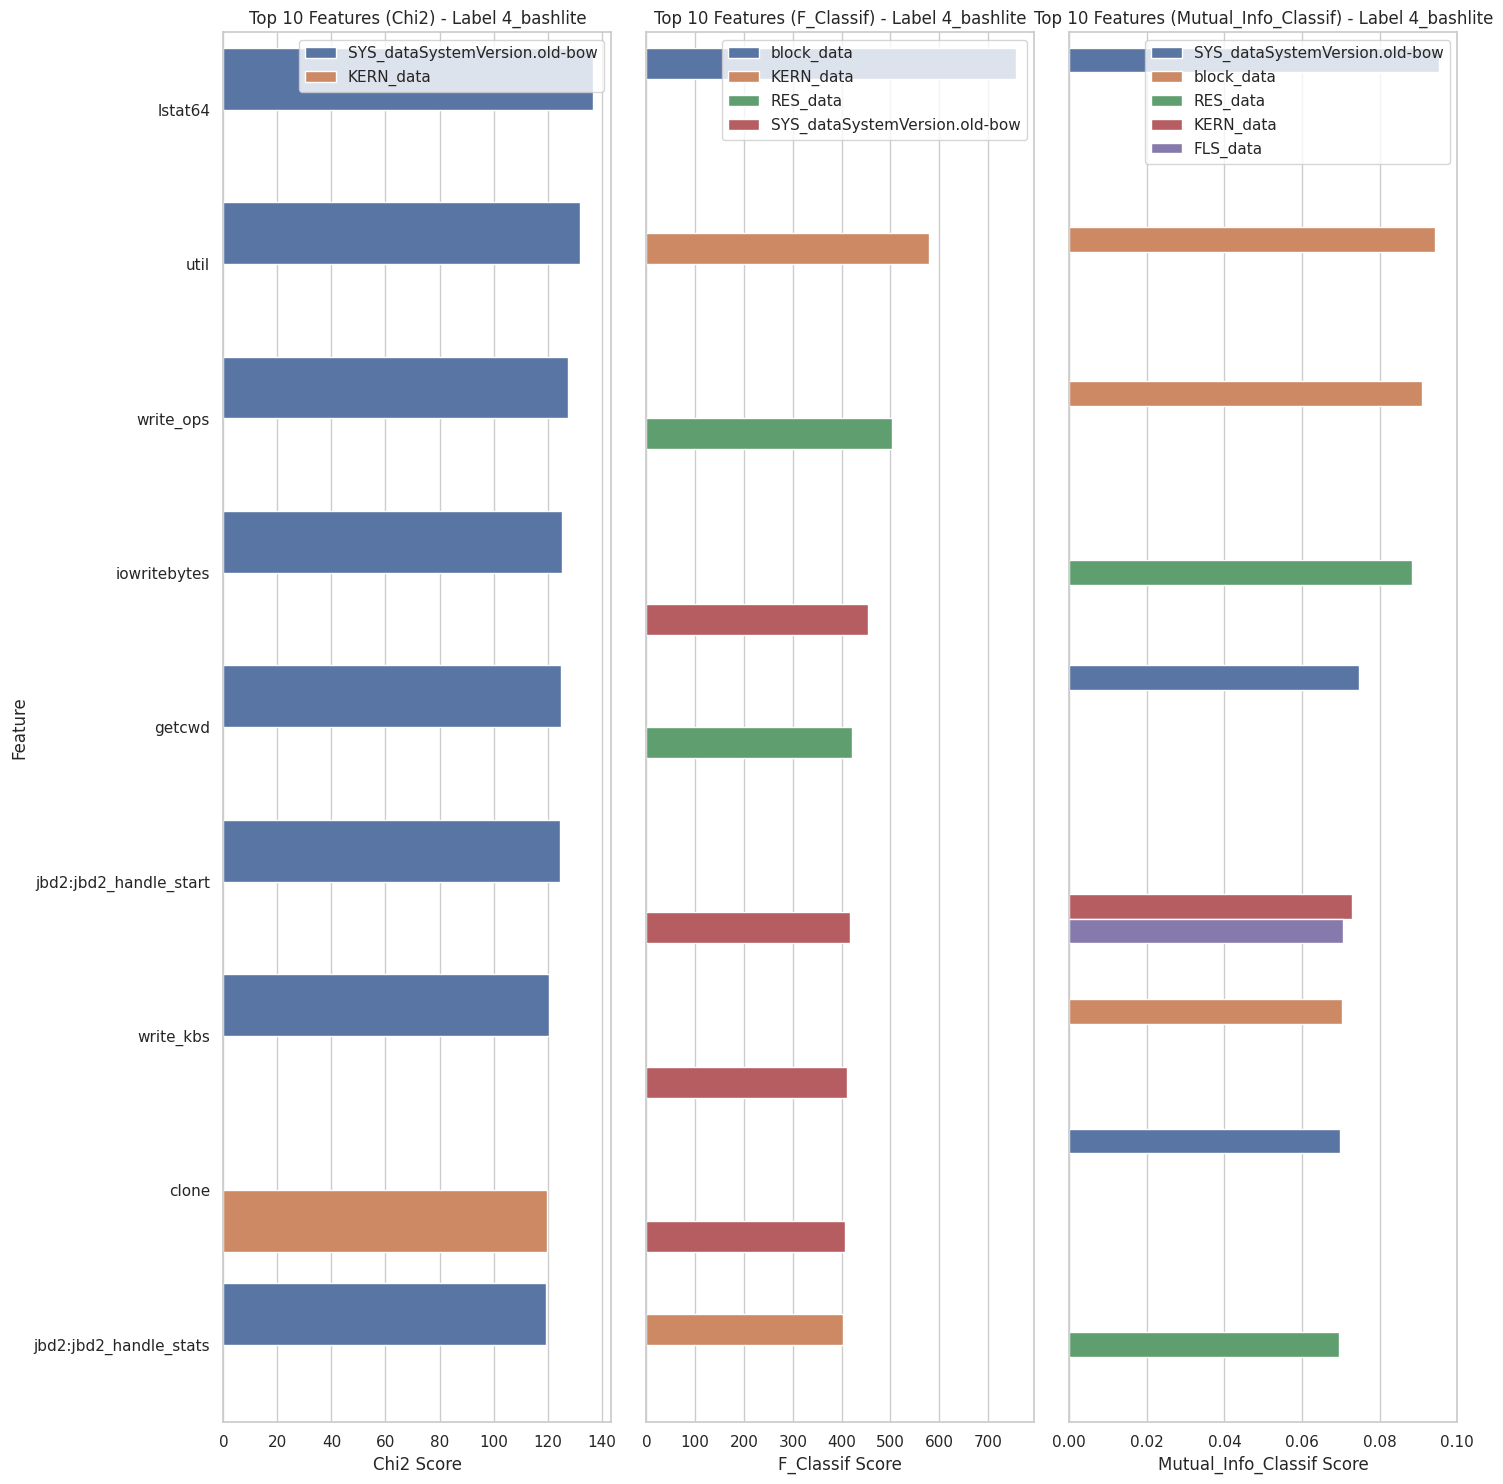

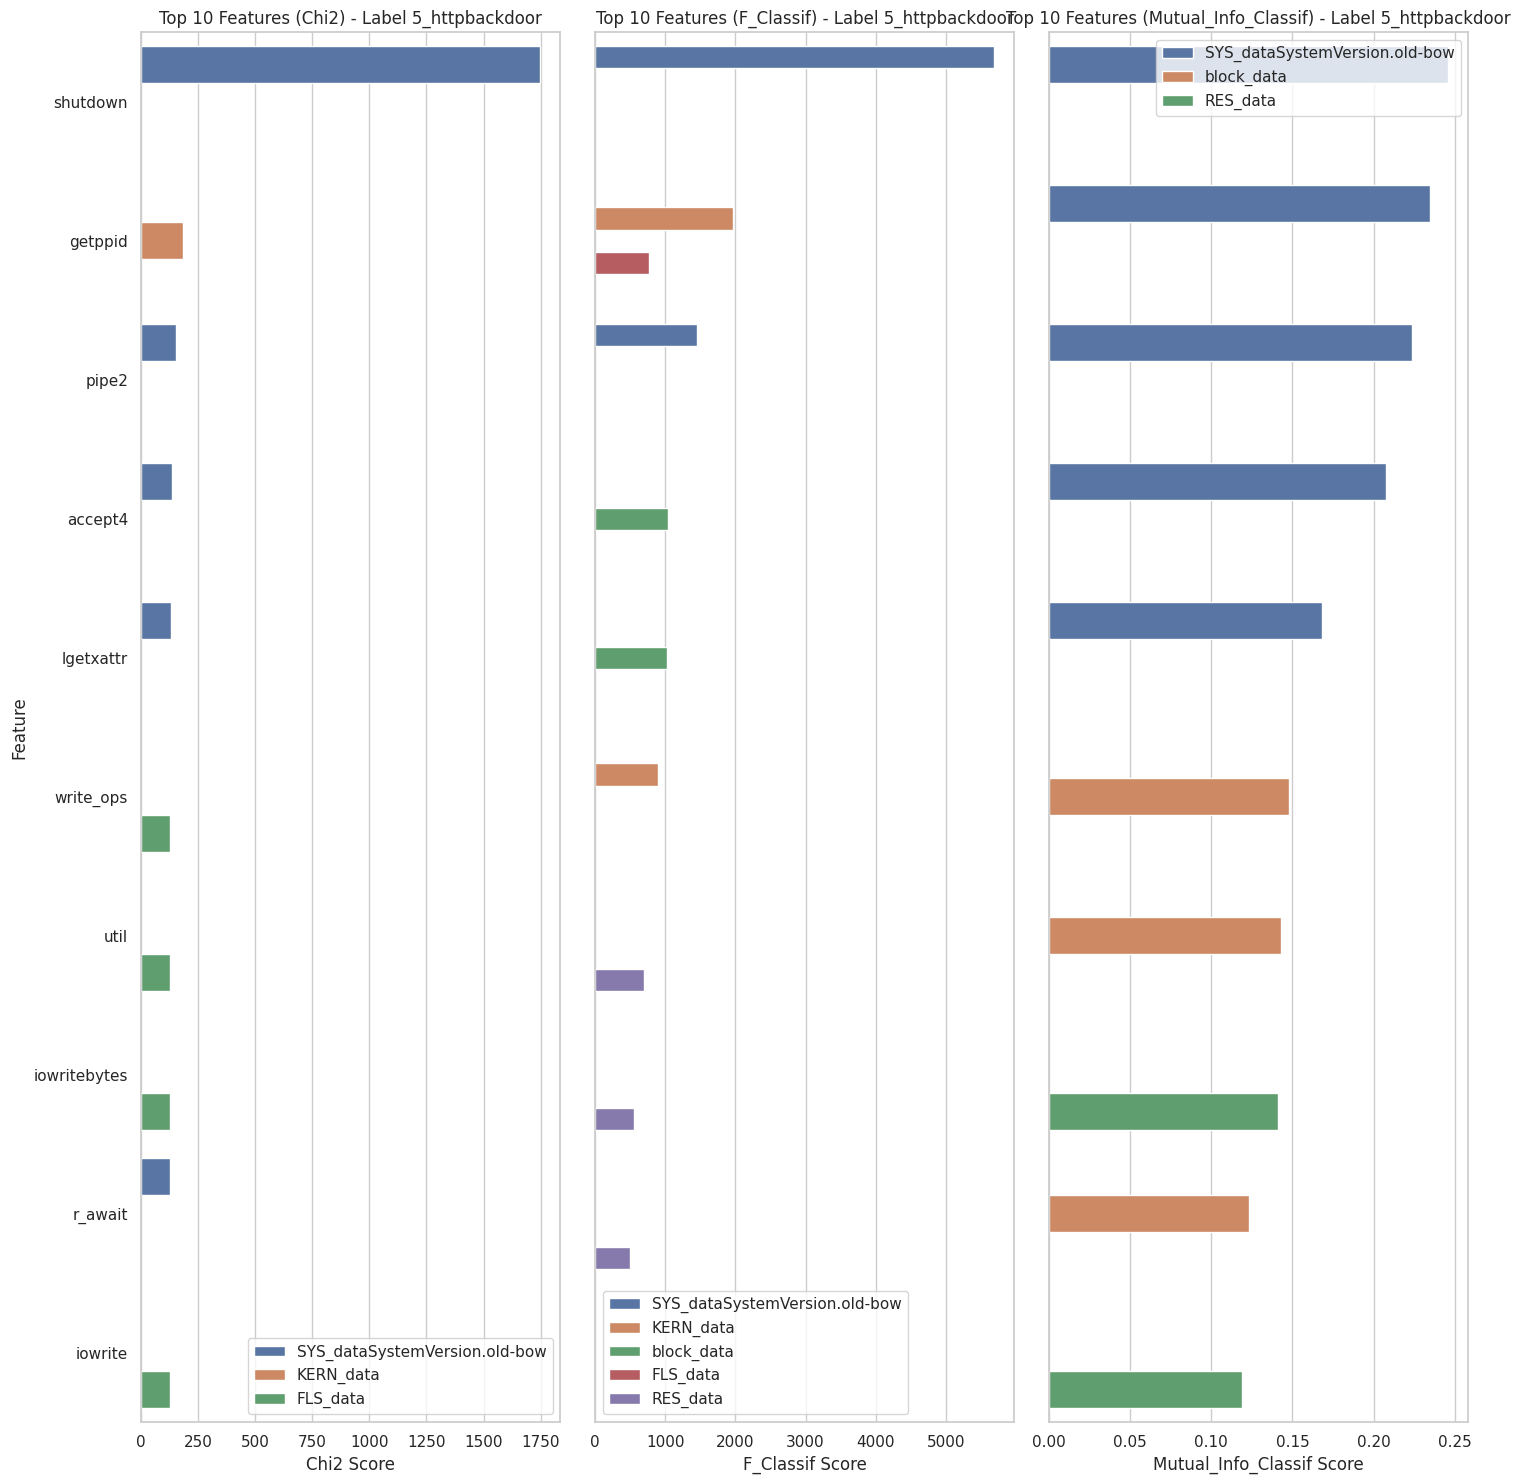

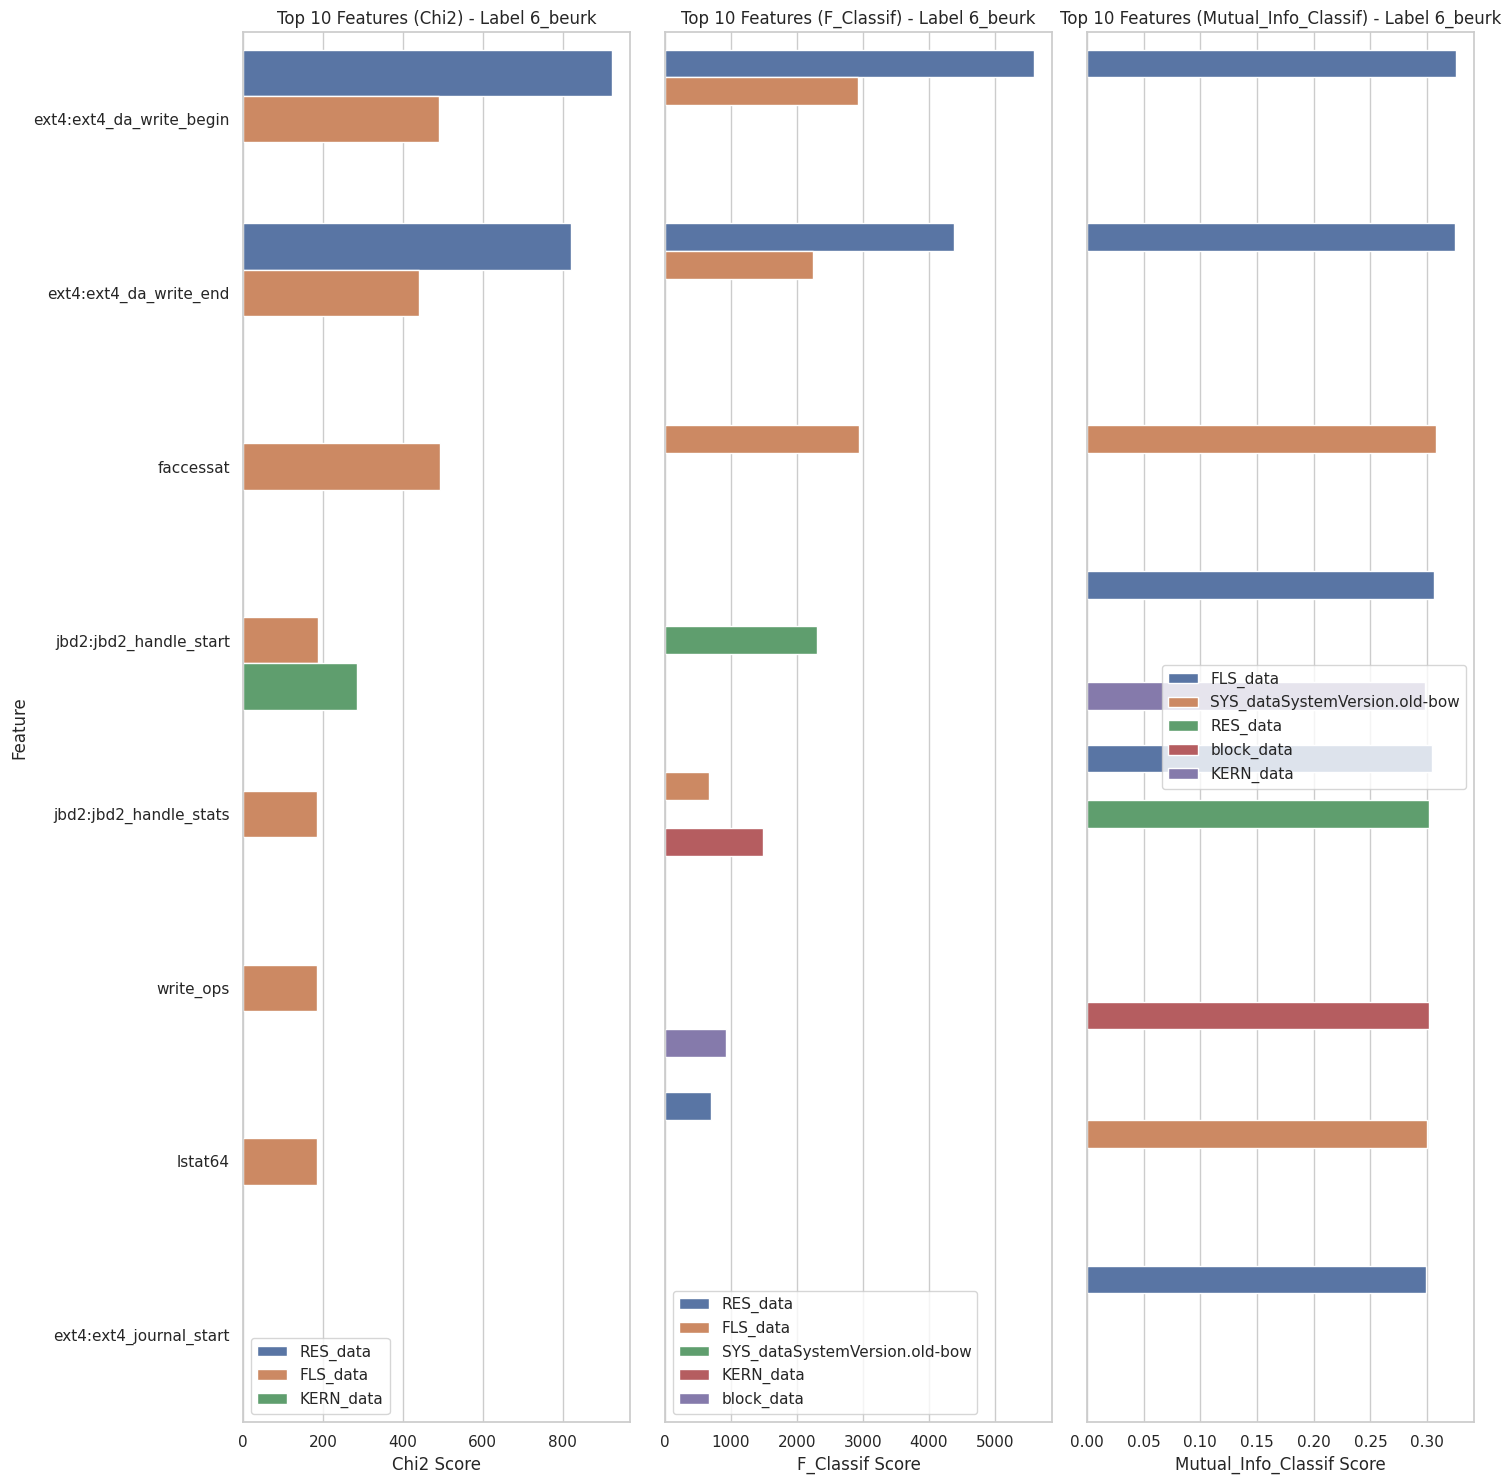

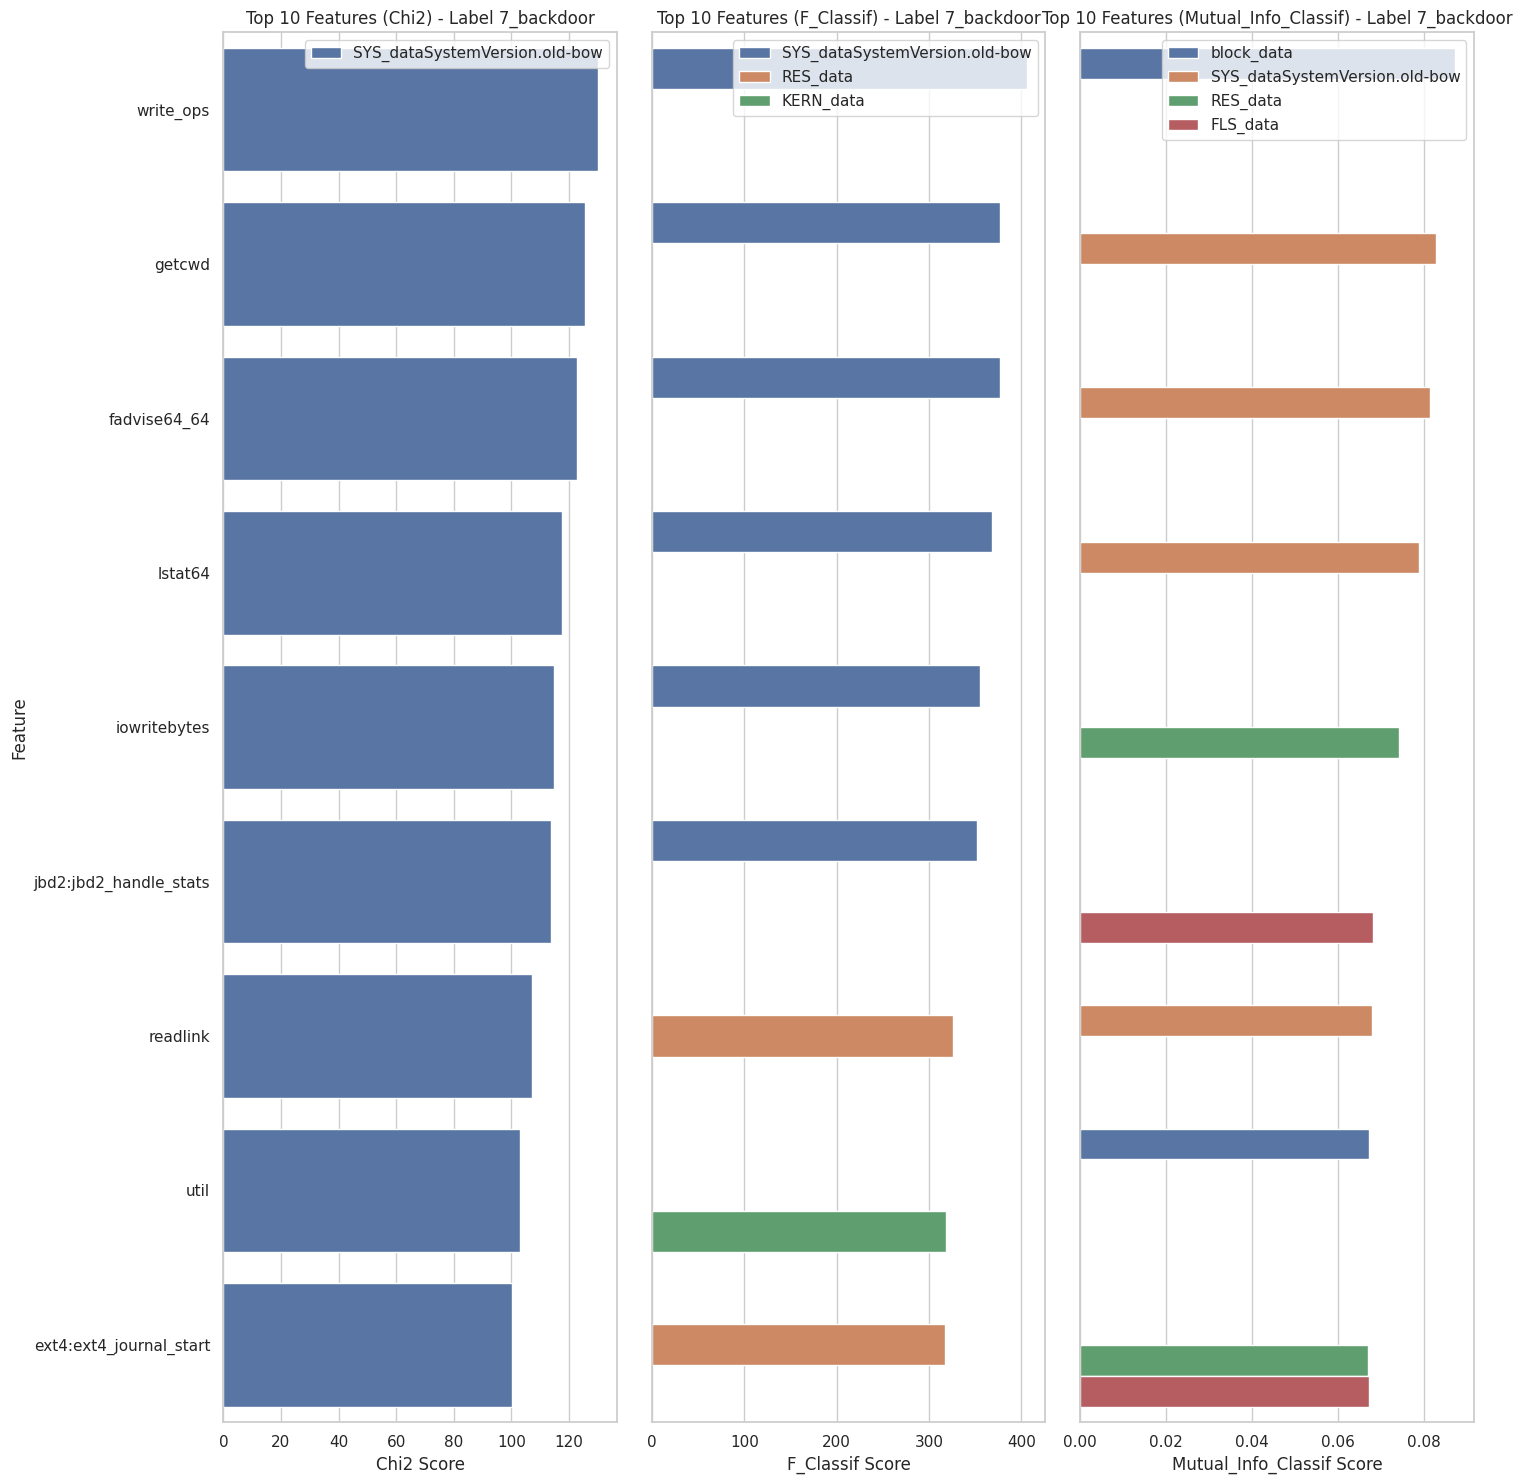

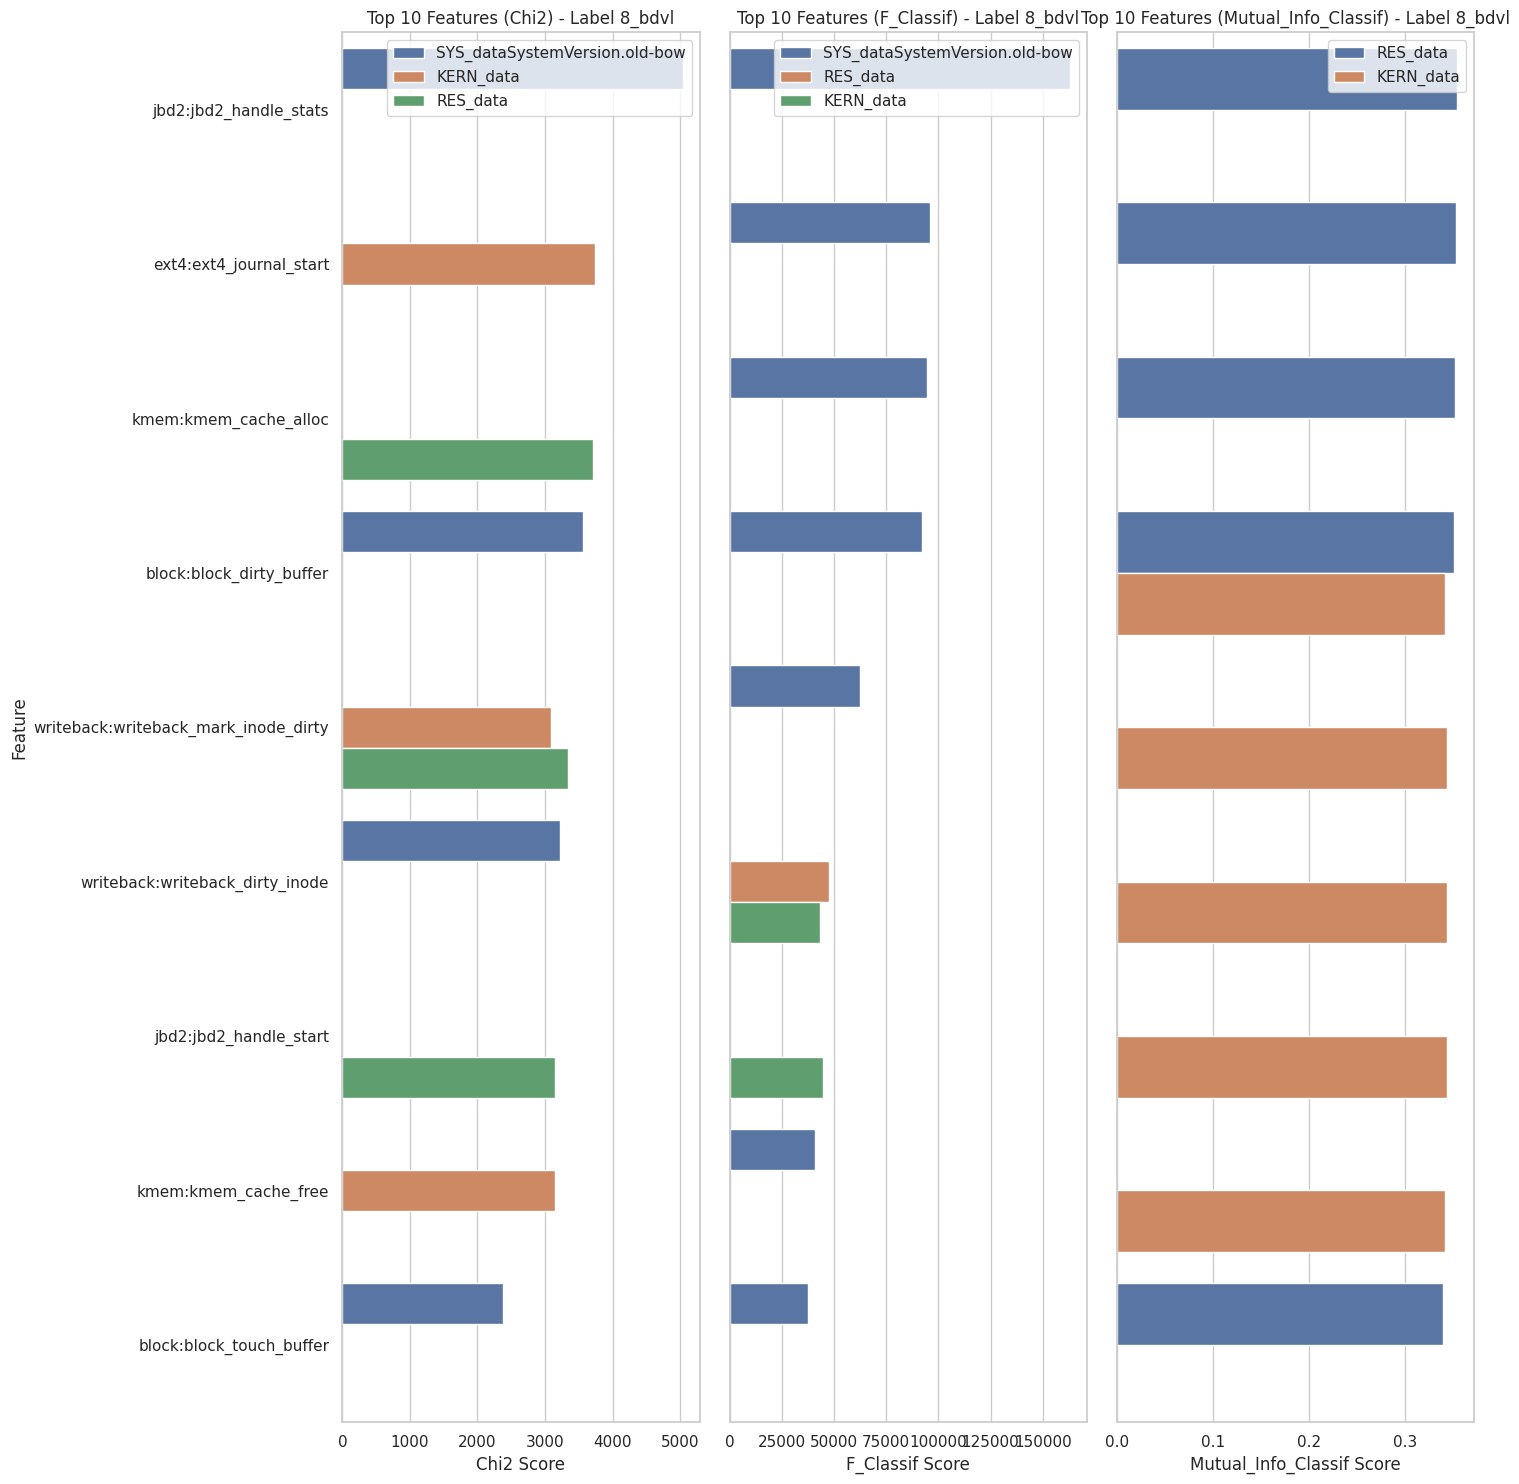

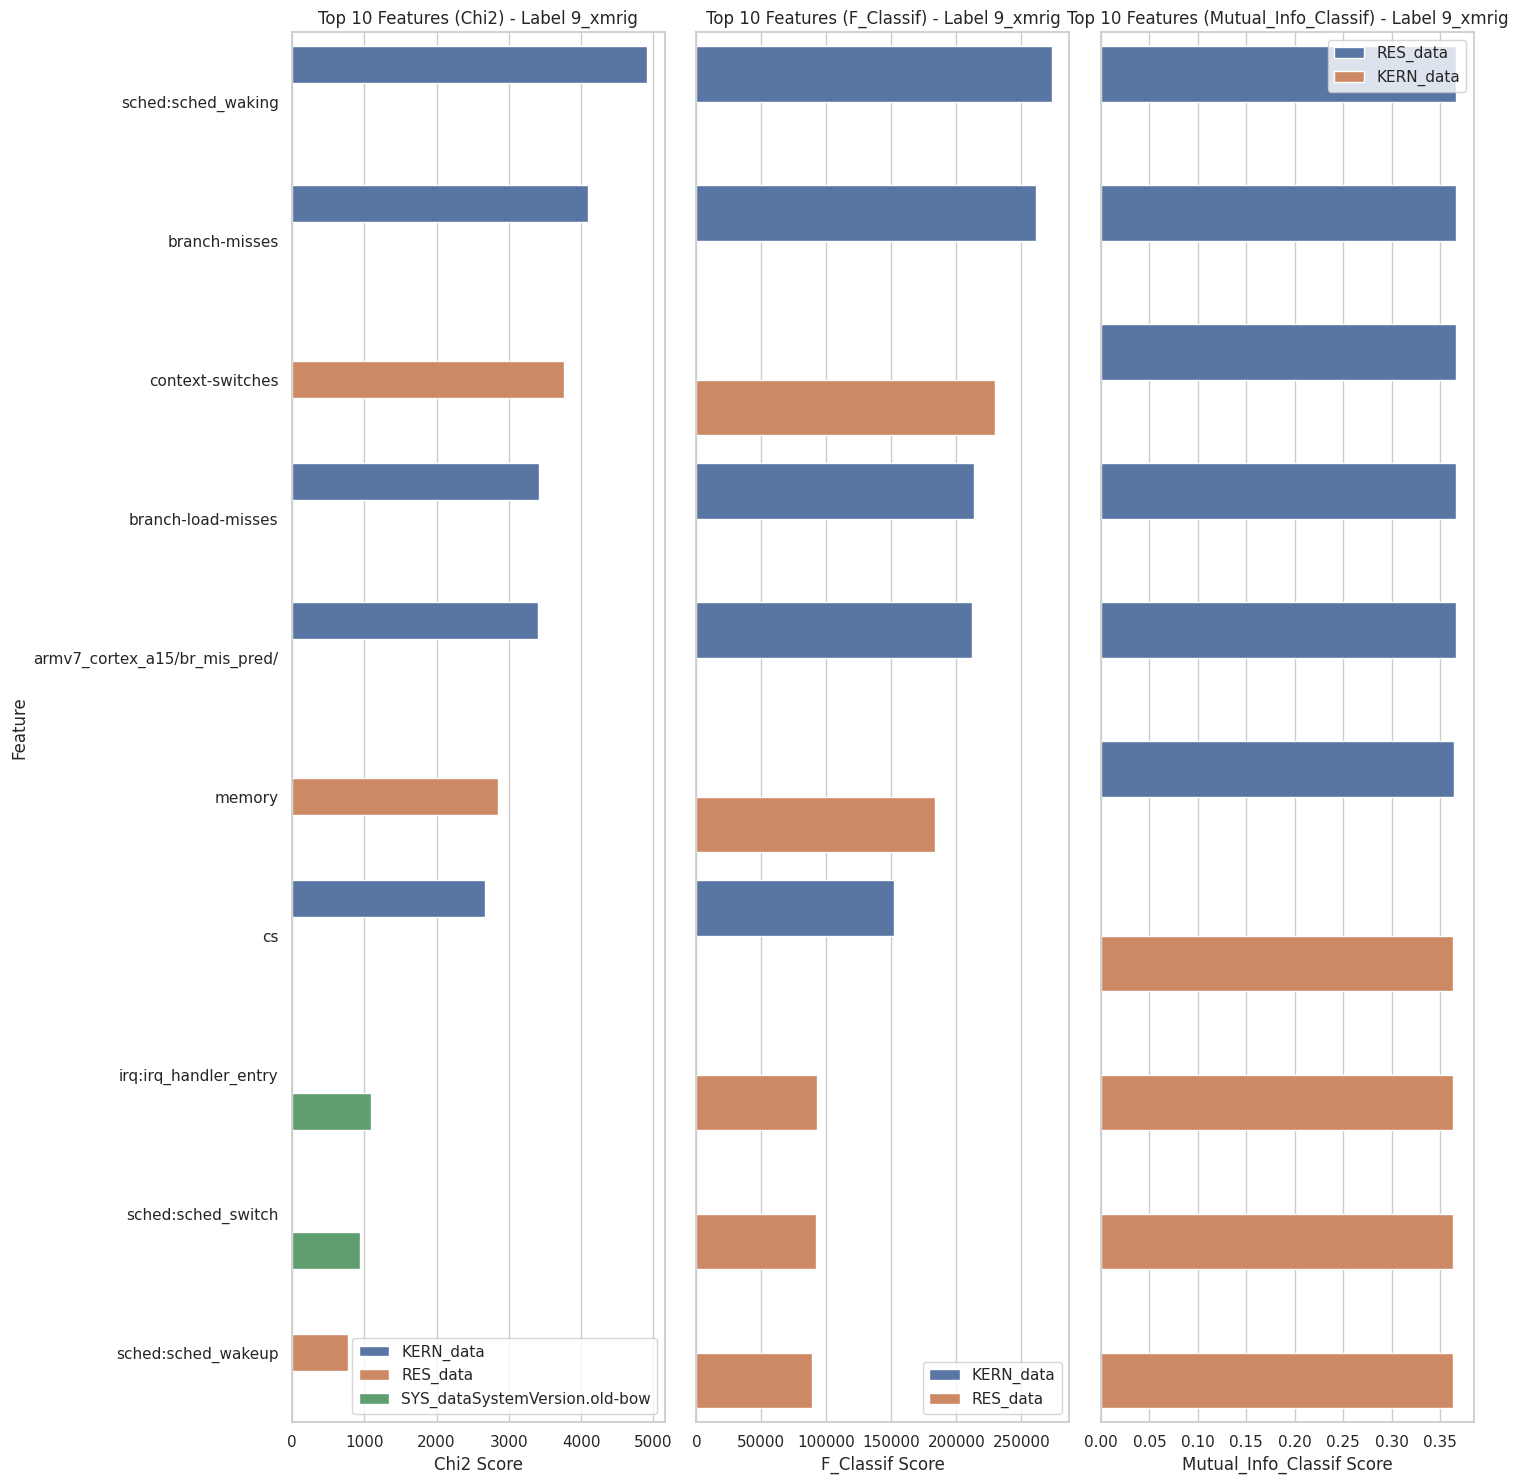

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plots
sns.set(style="whitegrid")

# Define the number of top features to display
top_k = 10

# Iterate over each label
for label, group in df.groupby("label"):
    # Get the top features for each score type
    largest_chi = group.nlargest(top_k, columns=["chi2"])
    largest_f_classif = group.nlargest(top_k, columns=["f_classif"])
    largest_mutual_info_classif = group.nlargest(top_k, columns=["mutual_info_classif"])

    # Create subplots for each label
    fig, axes = plt.subplots(1, 3, figsize=(15, 15), sharey=True)

    # Plot top features for each score type
    sns.barplot(x="chi2", y="feature", data=largest_chi, hue="data_source", ax=axes[0])
    sns.barplot(x="f_classif", y="feature", data=largest_f_classif, hue="data_source", ax=axes[1])
    sns.barplot(x="mutual_info_classif", y="feature", data=largest_mutual_info_classif, hue="data_source", ax=axes[2])

    # Set titles and labels
    axes[0].set_title(f'Top {top_k} Features (Chi2) - Label {label}')
    axes[0].set_ylabel('Feature')
    axes[0].set_xlabel('Chi2 Score')
    axes[1].set_title(f'Top {top_k} Features (F_Classif) - Label {label}')
    axes[1].set_ylabel('')
    axes[1].set_xlabel('F_Classif Score')
    axes[2].set_title(f'Top {top_k} Features (Mutual_Info_Classif) - Label {label}')
    axes[2].set_ylabel('')
    axes[2].set_xlabel('Mutual_Info_Classif Score')

    # Add legend
    axes[0].legend()
    axes[1].legend()
    axes[2].legend()

    # Adjust layout
    plt.tight_layout()

    # Show plot
    plt.show()


In [15]:
top_k = 10

for label, group in df.groupby("label"):
    largest_chi = group.nlargest(top_k, columns=["chi2"])#[["chi2", "feature", "data_source"]]
    largest_f_classif = group.nlargest(top_k, columns=["f_classif"])#[["f_classif", "feature", "data_source"]]
    largest_mutual_info_classif = group.nlargest(top_k, columns=["mutual_info_classif"])#[["mutual_info_classif", "feature", "data_source"]]

    # largest_chi["score_type"] = "chi2"
    # largest_chi.rename(columns={"chi2": "score"}, inplace=True)

    # largest_f_classif["score_type"] = "f_classif"
    # largest_f_classif.rename(columns={"f_classif": "score"}, inplace=True)

    # largest_mutual_info_classif["score_type"] = "mutual_info_classif"
    # largest_mutual_info_classif.rename(columns={"mutual_info_classif": "score"}, inplace=True)

    largest = pd.concat([largest_chi, largest_f_classif, largest_mutual_info_classif])


In [25]:
top_k = 5

largest_dfs = []
for label, group in df.groupby("label"):
    largest_chi = group.nlargest(top_k, columns=["chi2"])
    largest_f_classif = group.nlargest(top_k, columns=["f_classif"])
    largest_mutual_info_classif = group.nlargest(top_k, columns=["mutual_info_classif"])

    largest = pd.concat([largest_chi, largest_f_classif, largest_mutual_info_classif])
    largest_dfs.append(largest)

largest = pd.concat(largest_dfs)

In [26]:
largest[largest["data_source"]=="network_data"]

,chi2,f_classif,mutual_info_classif,feature,label,data_source


In [27]:
print(largest["data_source"].unique())

['SYS_dataSystemVersion.old-bow' 'KERN_data' 'block_data' 'RES_data'
 'FLS_data' 'network_datax40s']


In [104]:
largest.loc[largest["data_source"] == "SYS_dataSystemVersion.old-bow", "data_source"] = "SYS_data"
largest.loc[largest["data_source"] == "network_datax40s", "data_source"] = "network_data"

In [105]:
largest["data_source"].unique()

array(['SYS_data', 'KERN_data', 'block_data', 'RES_data', 'FLS_data',
       'network_data'], dtype=object)

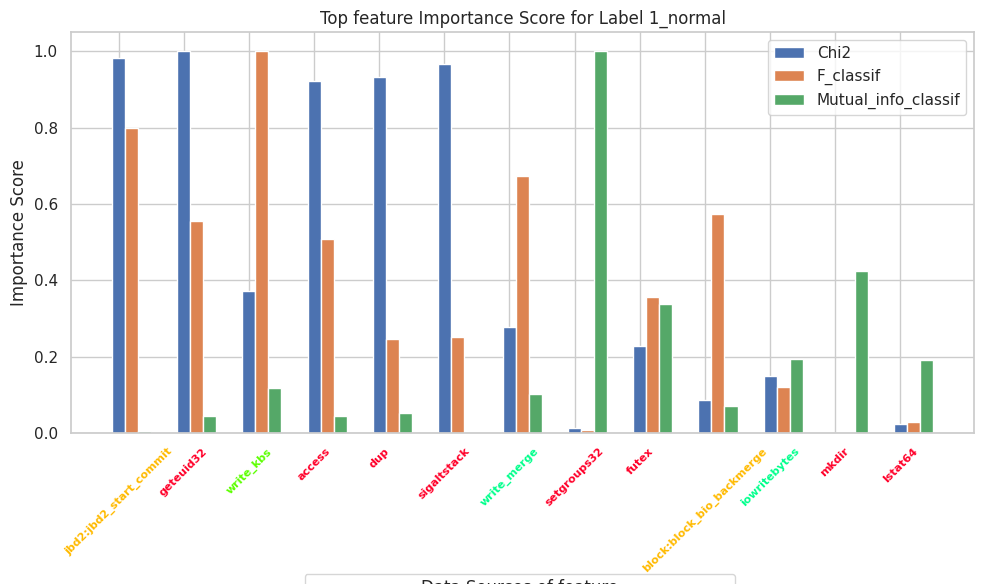

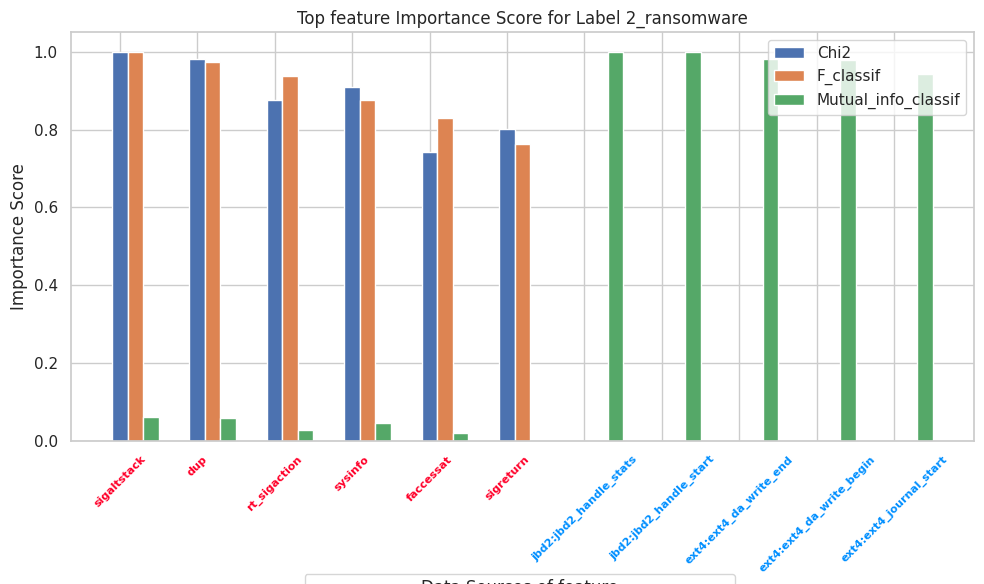

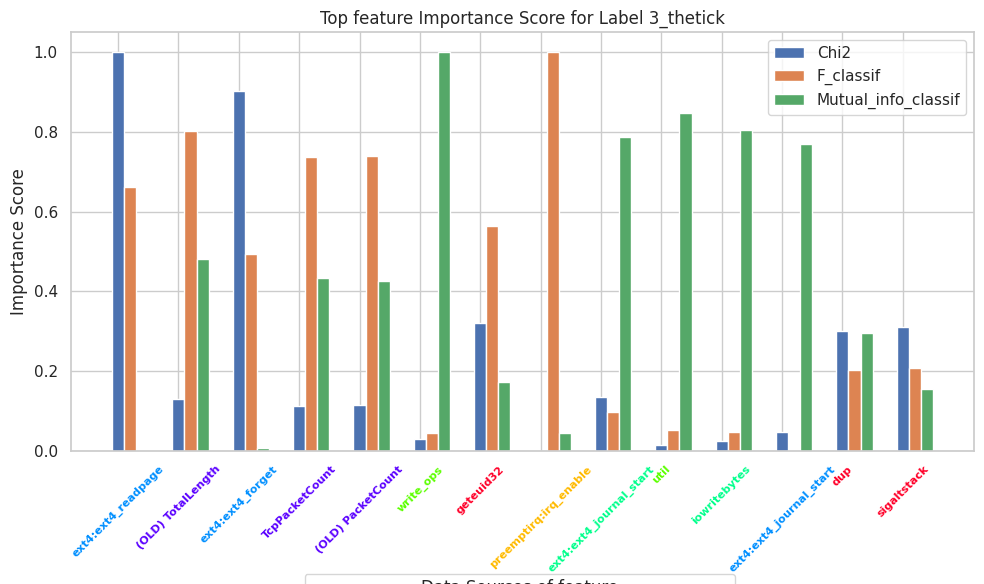

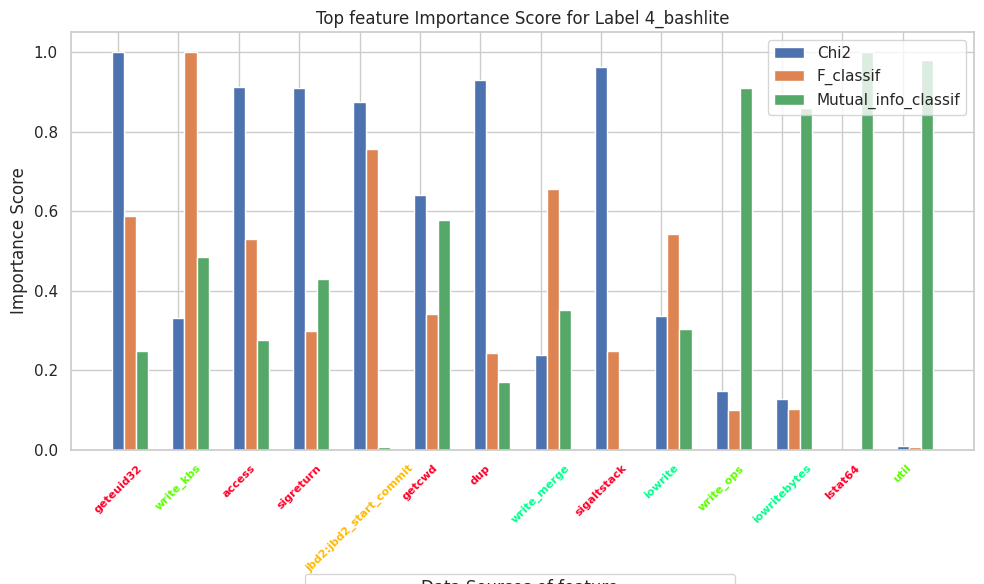

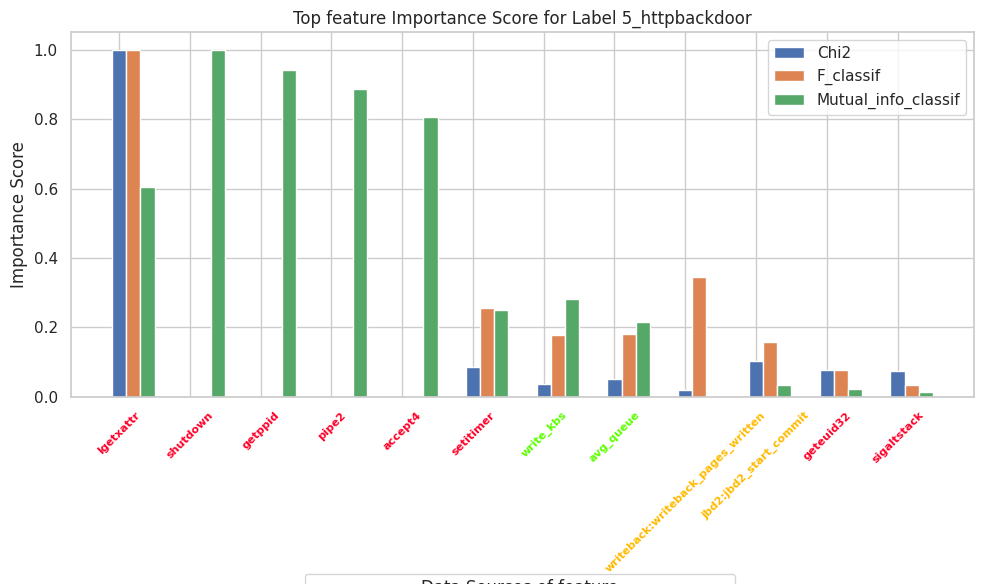

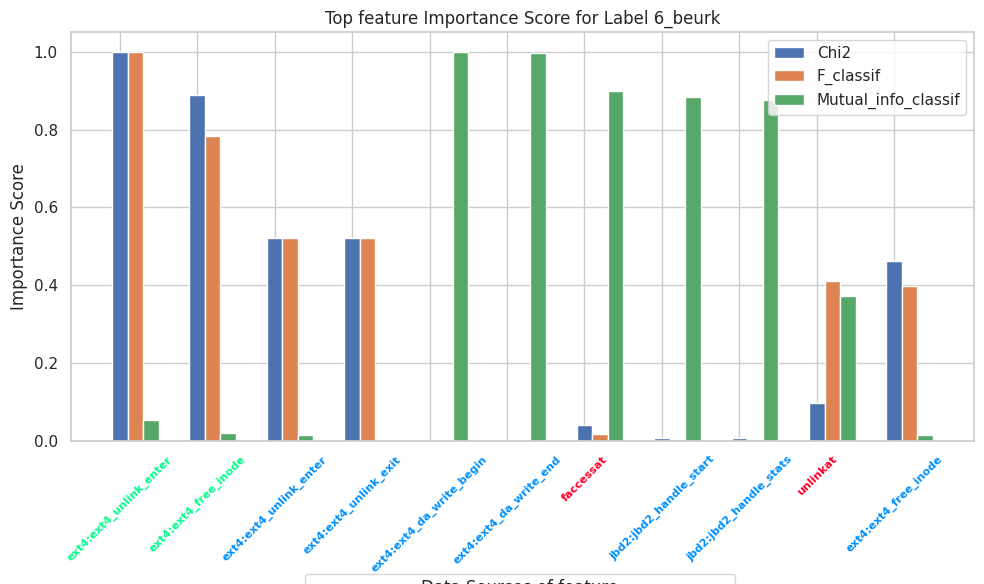

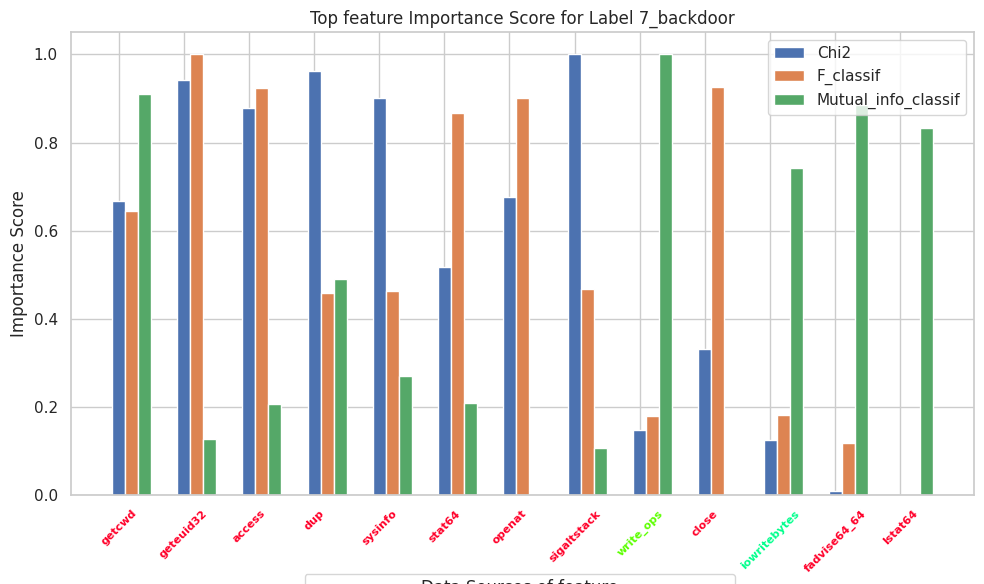

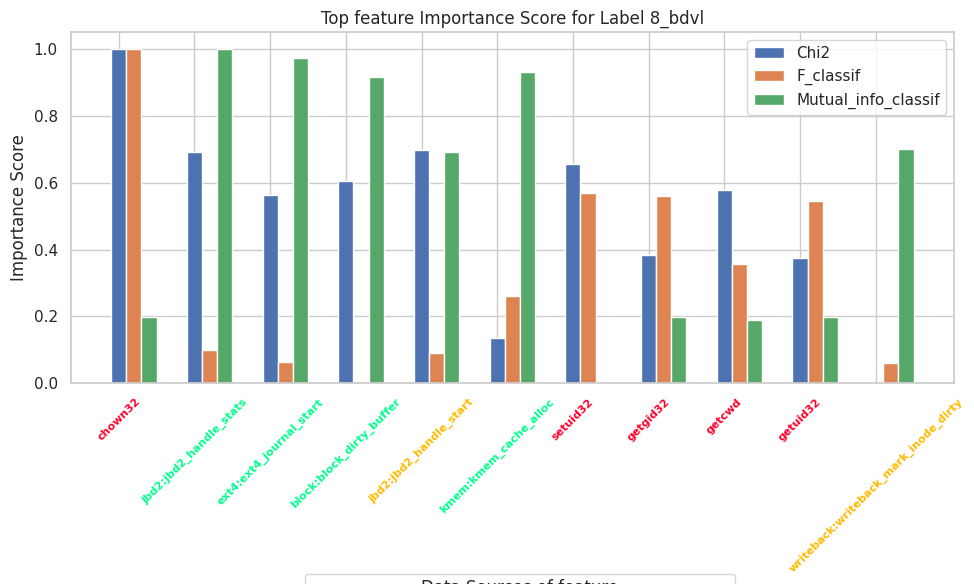

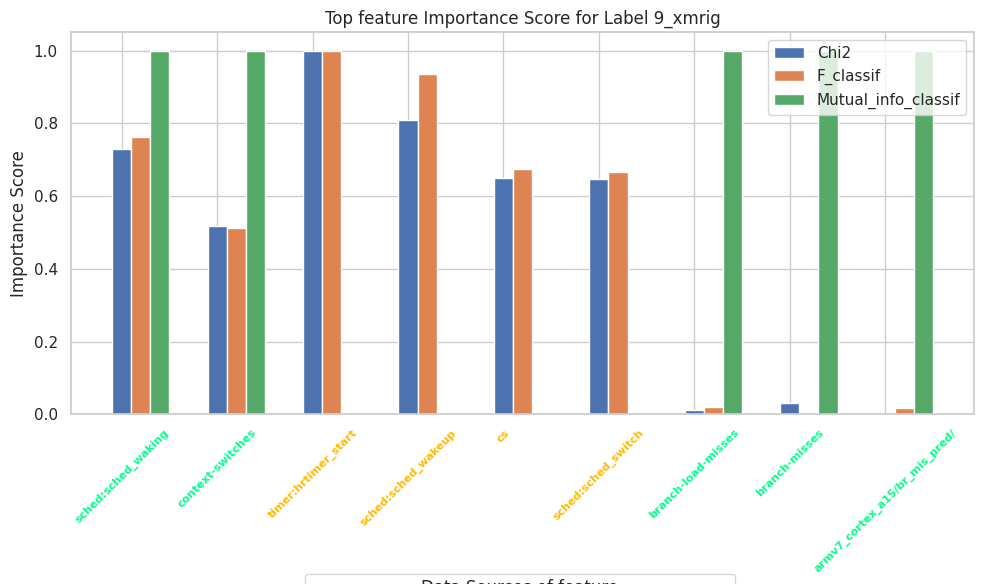

{'SYS_data': (1.0, 0.0, 0.16, 1.0), 'KERN_data': (1.0, 0.7281399046104929, 0.0, 1.0), 'block_data': (0.36036036036036034, 1.0, 0.0, 1.0), 'RES_data': (0.0, 1.0, 0.5481762597512125, 1.0), 'FLS_data': (0.0, 0.5615942028985503, 1.0, 1.0), 'network_data': (0.35485933503836337, 0.0, 1.0, 1.0)}


In [108]:
import matplotlib.pyplot as plt

# Assuming 'largest' DataFrame contains the top features selected by all methods
# 'largest' DataFrame should have columns: 'feature', 'chi2', 'f_classif', 'mutual_info_classif', 'label'
num_unique_sources = len(largest['data_source'].unique())
# https://matplotlib.org/stable/users/explain/colors/colormaps.html
palette = plt.get_cmap('gist_rainbow')
data_source_colors = {}
for i, source in enumerate(largest['data_source'].unique()):
    data_source_colors[source] = palette(i / num_unique_sources)

# Iterate over unique labels in the 'largest' DataFrame
for label in largest['label'].unique():
    # Filter the DataFrame for the current label
    label_data = largest[largest['label'] == label].copy()
    label_data.reset_index(drop=True, inplace=True)

    label_data = feature_plotting.minmax_scale_features(label_data,
                                                               remove_outliers_iqr_all_columns=False,
                                                               cols_to_exclude_from_scaling=["feature", "label","data_source"])
    
    label_data["mean"] = label_data[["chi2", "f_classif", "mutual_info_classif"]].mean(axis=1)
    label_data.sort_values(by="mean", ascending=False, inplace=True)

    label_data.reset_index(inplace=True)

    largest.drop_duplicates(inplace=True)

    # Extract feature names and importance scores for each method
    features = label_data['feature']
    chi2_scores = label_data['chi2']
    f_classif_scores = label_data['f_classif']
    mutual_info_scores = label_data['mutual_info_classif']
    
    # Set the position for the bars
    x = range(len(features))
    
    # Plotting the importance of features for the current label using bar plot
    fig = plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    # plt.subplots_adjust(bottom=0.7)
    plt.bar(x, chi2_scores, width=0.2, align='center', label='Chi2')
    plt.bar([pos + 0.2 for pos in x], f_classif_scores, width=0.2, align='center', label='F_classif')
    plt.bar([pos + 0.4 for pos in x], mutual_info_scores, width=0.2, align='center', label='Mutual_info_classif')   
    
    # plt.tight_layout(rect=[0, 0, 1, 0.75])
    # Add labels and title
    # plt.xlabel('Features')
    plt.ylabel('Importance Score')
    plt.title(f'Top feature Importance Score for Label {label}')

    plt.xticks([pos - 0. for pos in x], features, rotation=45)  # Rotate x-axis labels for better readability
    
    # Add legend for data source colors
    handles = [plt.Rectangle((0,0),1,1, color=data_source_colors[source]) for source in data_source_colors]
    labels = data_source_colors.keys()
    legend_old = plt.legend(handles, labels, title='Data Sources of feature', fontsize='small',loc="lower right",
                bbox_transform=fig.transFigure, ncol=3,  bbox_to_anchor=(0.75, -0.1), fancybox=True)

    ax = plt.gca()
    for i, tick in enumerate(ax.get_xticklabels()):
        data_source = label_data.loc[i, 'data_source']
        if data_source in data_source_colors:
            tick.set_color(data_source_colors[data_source])
            tick.set_fontsize(8)
            # bold
            tick.set_fontweight(800)

    plt.legend(loc='upper right')
    plt.gca().add_artist(legend_old)
    # Show plot
    plt.tight_layout()
    plt.show()

    fig.savefig(f'plots/plot_feature_importance_top_{top_k}_label_{label}.png', dpi=300, format='png', bbox_extra_artists=(legend_old,), bbox_inches='tight')
    # break

print(data_source_colors)
